# Data Dictionary
Units = Schools * Year

In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'), low_memory = False)
data = pd.read_csv(os.path.join(data_path, 'clean', 'gdid.csv'), low_memory = False)
data1415 = data[data.year ==  2015]
data1718 = data[data.year == 2018]
data.tail()

,Unnamed: 0,year,campus,campname,campischarter,district,distname,distischarter,rating_academic,rating_financial,...,type_urban,type_suburban,type_town,type_rural,eligible,teachers_nodegree,teachers_badegree,teachers_msdegree,teachers_phddegree,treatpost
69239,69239,2019,254901101,DR TOMAS RIVERA EL,N,254901,CRYSTAL CITY ISD,N,C,Pass,...,0,0,1,0,1,0.0,0.961240,0.038760,0.0,False
69240,69240,2019,254901104,BENITO JUAREZ MIDDLE,N,254901,CRYSTAL CITY ISD,N,C,Pass,...,0,0,1,0,1,0.0,0.950739,0.049261,0.0,False
69241,69241,2019,254901106,ZAVALA EL,N,254901,CRYSTAL CITY ISD,N,C,Pass,...,0,0,1,0,1,0.0,0.897611,0.102389,0.0,False
69242,69242,2019,254902001,LA PRYOR H S,N,254902,LA PRYOR ISD,N,C,Pass,...,0,0,0,1,1,0.0,0.772152,0.227848,0.0,True
69243,69243,2019,254902101,LA PRYOR EL,N,254902,LA PRYOR ISD,N,C,Pass,...,0,0,0,1,1,0.0,0.989950,0.010050,0.0,True


In [30]:
list(data.columns)

['Unnamed: 0',
 'year',
 'campus',
 'campname',
 'campischarter',
 'district',
 'distname',
 'distischarter',
 'rating_academic',
 'rating_financial',
 'rating_academic_c',
 'type',
 'type_description',
 'cntyname_c',
 'students_amind_num',
 'students_asian_num',
 'students_black_num',
 'students_frpl_num',
 'students_hisp_num',
 'students_num',
 'students_paci_num',
 'students_tworaces_num',
 'students_white_num',
 'teachers_badegree_num',
 'teachers_exp_ave',
 'teachers_msdegree_num',
 'teachers_new_num',
 'teachers_nodegree_num',
 'teachers_num',
 'teachers_phddegree_num',
 'teachers_tenure_ave',
 'alg_avescore',
 'bio_avescore',
 'eng1_avescore',
 'eng2_avescore',
 'm_3rd_avescore',
 'm_4th_avescore',
 'm_5th_avescore',
 'm_6th_avescore',
 'm_7th_avescore',
 'm_8th_avescore',
 'r_3rd_avescore',
 'r_4th_avescore',
 'r_5th_avescore',
 'r_6th_avescore',
 'r_7th_avescore',
 'r_8th_avescore',
 's_8th_avescore',
 'us_avescore',
 'alg_numtakers',
 'bio_numtakers',
 'eng1_numtakers',
 'eng

# Units
> Traditional public schools within districts by year

In [31]:
data[['district', 'campus', 'year']].groupby(['year']).nunique()[['district', 'campus']]

,district,campus
year,,
2012,1227,8529
2013,1228,8555
2014,1227,8574
2015,1219,8646
2016,1207,8673
2017,1203,8757
2018,1196,8755
2019,1196,8755


# Treatment Status

### District of Innovation
> District has declared District of Innovation status at any point from 2014-15 school year to 2017-18 school year.	
### Year
> Year in May

In [63]:
data[['district', 'campus', 'year']][data.doi == True].groupby(['year']).nunique()[['district', 'campus']]

,district,campus
year,,
2012,822,6334
2013,823,6333
2014,824,6336
2015,824,6373
2016,824,6377
2017,824,6420
2018,824,6405


### Treatment 
> Declared District of Innovation status before the calendar year of interest.

In [64]:
print('When did districts declare DOI status?')
df = data[data.doi == True]
df[['district', 'campus', 'year', 'doi', 'doi_year']].groupby(['doi_year']).nunique()[['district', 'campus']]

When did districts declare DOI status?


,district,campus
doi_year,,
2016.0,69,994
2017.0,586,4571
2018.0,133,1017
2019.0,23,219


In [65]:
import numpy as np
print('How many districts and campuses are in years one and two of treatment?')
df = data[data.doi == True]
df = df[df.treatpost == True]
df[['district', 'campus', 'year']].groupby(['year']).nunique()[['district', 'campus']]

How many districts and campuses are in years one and two of treatment?


,district,campus
year,,
2017,69,930
2018,655,5191


# Created weighted summaries

In [249]:
subject = 'm_3rd_'
yr = 2015
datayr = data[data.year == yr]
count = datayr[subject + 'numtakers'].sum()
datayr[subject + 'wt'] = datayr[subject + 'numtakers']/count
datayr[subject + 'wtd'] = datayr[subject + 'wt'] * datayr[subject + 'avescore']
datayr[subject + 'wtd'].sum()

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1449.8587255170464

# Graphing Outcomes

In [11]:
def create_group_df(df, outcome):
    new_df = pd.DataFrame(df.groupby(['year']).agg({outcome: ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'outcome_mean', 'sem': 'outcome_se'})
    new_df['ub'] = new_df[outcome]['outcome_mean'] + new_df[outcome]['outcome_se']
    new_df['lb'] = new_df[outcome]['outcome_mean'] - new_df[outcome]['outcome_se']
    return new_df

In [250]:
outcome = 'm_3rd_std'

In [251]:
# Create year groups
df_control = create_group_df(data[data.doi == False],outcome)
df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome)
df_control

m_3rd_std                   ub        lb
     outcome_mean outcome_se                    
year                                            
2012    -0.030480   0.030206 -0.000274 -0.060685
2013     0.127647   0.034623  0.162270  0.093024
2014     0.238270   0.036044  0.274315  0.202226
2015    -0.061520   0.031736 -0.029784 -0.093256
2016     0.196981   0.032487  0.229468  0.164493
2017     0.338456   0.033698  0.372154  0.304758
2018     0.374642   0.030900  0.405542  0.343743

In [252]:
df_treat2016

m_3rd_std                   ub        lb
     outcome_mean outcome_se                    
year                                            
2012     0.308888   0.042941  0.351829  0.265947
2013     0.511700   0.046921  0.558621  0.464779
2014     0.458787   0.046151  0.504938  0.412636
2015     0.170047   0.044526  0.214573  0.125520
2016     0.484017   0.043881  0.527898  0.440136
2017     0.571846   0.045911  0.617757  0.525934
2018     0.473659   0.045701  0.519359  0.427958

In [253]:
# Create type groups
df_control = create_group_df(data[data.doi == False], outcome)
df_charter = create_group_df(data[data.campischarter == 'Y'], outcome)
df_doi = create_group_df(data[data.doi == True], outcome)

In [254]:
df_exempt = create_group_df(data[data.reg25_081 == 1], outcome)
df_not_exempt = create_group_df(data[data.reg25_081 == 0], outcome)
df_exempt

AttributeError: 'DataFrame' object has no attribute 'reg25_081'

In [255]:
df_not_exempt

NameError: name 'df_not_exempt' is not defined

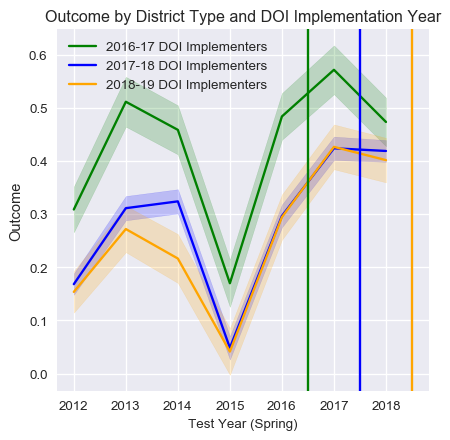

In [256]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
#plt.plot(list(df_control.index), df_control[outcome]['outcome_mean'], color = 'red', label = 'TPSD')
plt.plot(list(df_treat2016.index), df_treat2016[outcome]['outcome_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(list(df_treat2017.index), df_treat2017[outcome]['outcome_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(list(df_treat2018.index), df_treat2018[outcome]['outcome_mean'], color = 'orange', label = '2018-19 DOI Implementers')

#plt.plot(list(df_charter.index), df_charter[outcome]['outcome_mean'], color = 'pink', label = 'Charter')
#plt.plot(list(df_doi.index), df_doi[outcome]['outcome_mean'], color = 'black', label = 'DOI')


plt.legend()


#plt.fill_between(list(df_control.index), df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, color = 'green', alpha = .2)
plt.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, color = 'blue', alpha = .2)
plt.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, color = 'orange', alpha = .2)

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')



plt.ylabel('Outcome')
plt.title('Outcome by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.show()

# Achievement

## Elementary
> Average of grades 3-5 mean math and reading scores, standardized across state within grade and subject for 2014-15

,elem_reading
year,
2012,-0.086321
2013,-0.086941
2014,-0.096347
2015,0.027551
2016,0.112509
2017,0.037254
2018,0.225120


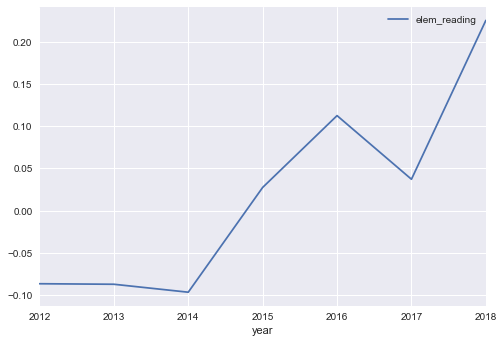

In [15]:
data[['campus', 'year', 'elem_reading']].groupby(['year']).mean()[['elem_reading']].plot()
display()
data[['campus', 'year', 'elem_reading']].groupby(['year']).mean()[['elem_reading']]

## Secondary Math
> Average of grades 6-8 math scores and Algebra, standardized across state within grade and subject for 2014-15

,sec_math
year,
2012,-0.122263
2013,-0.189549
2014,-0.077627
2015,-0.093911
2016,0.105187
2017,0.164214
2018,0.330495


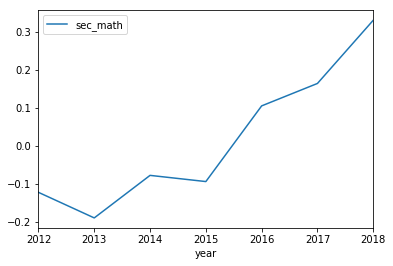

In [16]:
data[['campus', 'year', 'sec_math']].groupby(['year']).mean()[['sec_math']].plot()
display()
data[['campus', 'year', 'sec_math']].groupby(['year']).mean()[['sec_math']]

## Secondary English
> Average of grades 6-8 mean math scores and English I and II, standardized across state within grade and subject for 2014-15

,sec_reading
year,
2012,-0.052479
2013,0.011322
2014,0.043175
2015,0.048267
2016,0.082233
2017,-0.038538
2018,0.033582


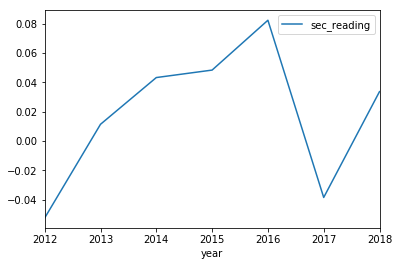

In [19]:
data[['campus', 'year', 'sec_reading']].groupby(['year']).mean()[['sec_reading']].plot()
display()
data[['campus', 'year', 'sec_reading']].groupby(['year']).mean()[['sec_reading']]

## Secondary Science
> Average of 8th grade science and biology, standardized across state within grade and subject for 2014-15

,sec_science
year,
2012,-0.243563
2013,-0.095075
2014,-0.008147
2015,0.084686
2016,0.323677
2017,0.265739
2018,0.470121


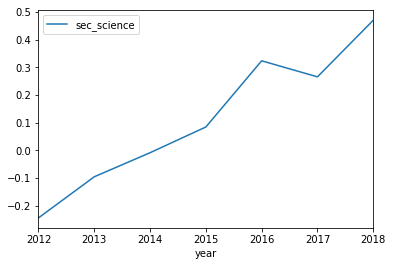

In [20]:
data[['campus', 'year', 'sec_science']].groupby(['year']).mean()[['sec_science']].plot()
display()
data[['campus', 'year', 'sec_science']].groupby(['year']).mean()[['sec_science']]

# Certification
## Any Certification
> Percent of teachers in campus who are certified to teach any grade or subject

,certification
year,
2012,NaN
2013,0.989136
2014,0.981285
2015,0.987903
2016,0.997265
2017,0.996121
2018,0.994704


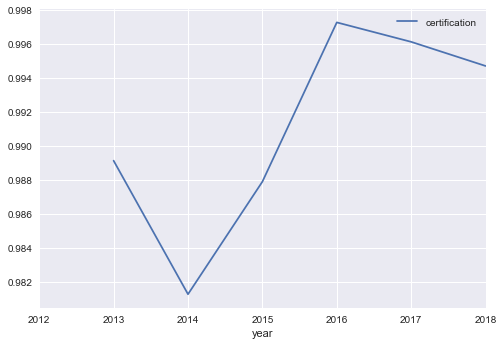

In [42]:
data[['campus', 'year', 'certification']].groupby(['year']).mean()[['certification']].plot()
display()
data[['campus', 'year', 'certification']].groupby(['year']).mean()[['certification']]

## Elementary Certification
> Percent of teachers in elementary school whose certification level is elementary

,cert_area_elem
year,
2012,NaN
2013,0.912860
2014,0.908770
2015,0.907144
2016,0.905840
2017,0.842071
2018,0.791732


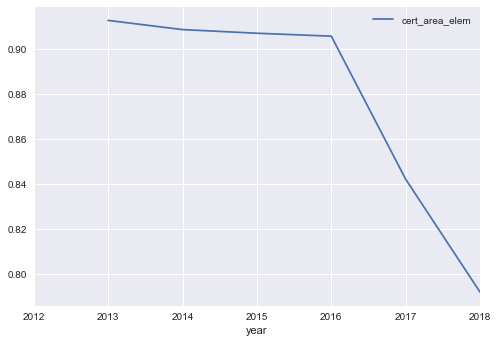

In [46]:
data[['campus', 'year', 'cert_area_elem']].groupby(['year']).mean()[['cert_area_elem']].plot()
display()
data[['campus', 'year', 'cert_area_elem']].groupby(['year']).mean()[['cert_area_elem']]

,cert_secondary_math
year,
2012,NaN
2013,0.151615
2014,0.243815
2015,0.183827
2016,0.762566
2017,0.738576
2018,0.729343


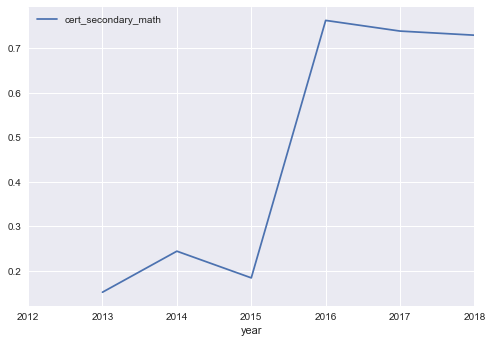

In [18]:
data[['campus', 'year', 'cert_secondary_math']].groupby(['year']).mean()[['cert_secondary_math']].plot()
display()
data[['campus', 'year', 'cert_secondary_math']].groupby(['year']).mean()[['cert_secondary_math']]

In [17]:
list(data.columns)

['Unnamed: 0',
 'year',
 'campus',
 'campname',
 'campischarter',
 'district',
 'distname',
 'distischarter',
 'rating_academic',
 'rating_financial',
 'rating_academic_c',
 'type',
 'type_description',
 'cntyname_c',
 'students_amind_num',
 'students_asian_num',
 'students_black_num',
 'students_frpl_num',
 'students_hisp_num',
 'students_num',
 'students_paci_num',
 'students_tworaces_num',
 'students_white_num',
 'teachers_badegree_num',
 'teachers_exp_ave',
 'teachers_msdegree_num',
 'teachers_new_num',
 'teachers_nodegree_num',
 'teachers_num',
 'teachers_phddegree_num',
 'teachers_tenure_ave',
 'alg_avescore',
 'bio_avescore',
 'eng1_avescore',
 'eng2_avescore',
 'm_3rd_avescore',
 'm_4th_avescore',
 'm_5th_avescore',
 'm_6th_avescore',
 'm_7th_avescore',
 'm_8th_avescore',
 'r_3rd_avescore',
 'r_4th_avescore',
 'r_5th_avescore',
 'r_6th_avescore',
 'r_7th_avescore',
 'r_8th_avescore',
 's_8th_avescore',
 'us_avescore',
 'days_max',
 'days_mean',
 'days_min',
 'class_size_1',
 'c

# Certification

In [ ]:
https://tea.texas.gov/Reports_and_Data/Educator_Data/Educator_Reports_and_Data

,cert_area_elem
year,
2012,NaN
2013,0.912860
2014,0.908770
2015,0.907144
2016,0.905840
2017,0.842071
2018,0.791732


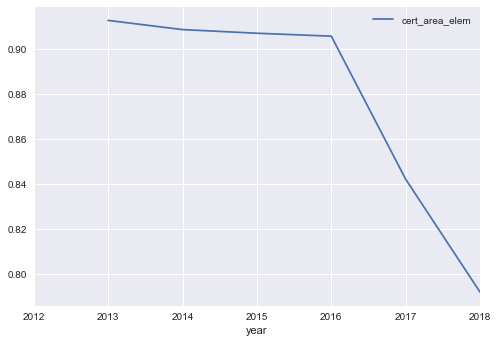

In [27]:
data[['campus', 'year', 'cert_area_elem']].groupby(['year']).mean()[['cert_area_elem']].plot()
display()
data[['campus', 'year', 'cert_area_elem']].groupby(['year']).mean()[['cert_area_elem']]

In [29]:
def create_group_df(df, outcome):
    new_df = pd.DataFrame(df.groupby(['year']).agg({outcome: ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df[outcome]['score_mean'] + new_df[outcome]['score_se']
    new_df['lb'] = new_df[outcome]['score_mean'] - new_df[outcome]['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False], 'cert_area_elem')
df_treat2016 = create_group_df(data[data.doi_year == 2016], 'cert_area_elem')
df_treat2017 = create_group_df(data[data.doi_year == 2017], 'cert_area_elem')
df_treat2018 = create_group_df(data[data.doi_year == 2018], 'cert_area_elem')
df_control

cert_area_elem                  ub        lb
         score_mean  score_se                    
year                                             
2012            NaN       NaN       NaN       NaN
2013       0.874053  0.004037  0.878091  0.870016
2014       0.874070  0.003906  0.877976  0.870164
2015       0.877922  0.003652  0.881573  0.874270
2016       0.875964  0.003934  0.879898  0.872030
2017       0.817829  0.004410  0.822240  0.813419
2018       0.766964  0.004819  0.771783  0.762145

,cert_area_voc
year,
2012,NaN
2013,0.555556
2014,0.545455
2015,0.463768
2016,0.595238
2017,0.453333
2018,0.448718


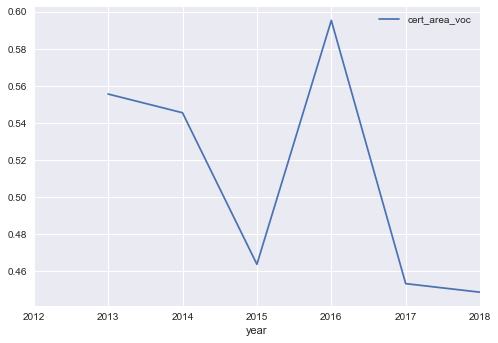

In [31]:
data[['campus', 'year', 'cert_area_voc']].groupby(['year']).mean()[['cert_area_voc']].plot()
display()
data[['campus', 'year', 'cert_area_voc']].groupby(['year']).mean()[['cert_area_voc']]

# Student Teacher Ratio

,stu_teach_ratio
year,
2012,14.664132
2013,14.714768
2014,14.644547
2015,14.456908
2016,14.413076
2017,14.358585
2018,14.322024


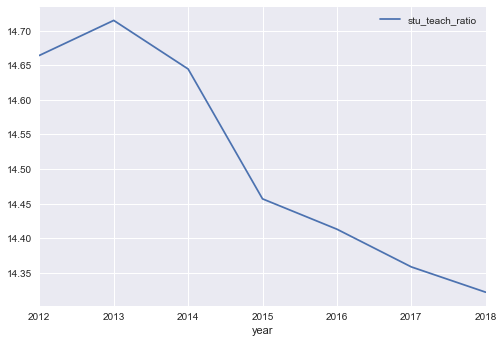

In [33]:
data[['campus', 'year', 'stu_teach_ratio']].groupby(['year']).mean()[['stu_teach_ratio']].plot()
display()
data[['campus', 'year', 'stu_teach_ratio']].groupby(['year']).mean()[['stu_teach_ratio']]

In [37]:
def create_group_df(df, outcome):
    new_df = pd.DataFrame(df.groupby(['year']).agg({outcome: ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df[outcome]['score_mean'] + new_df[outcome]['score_se']
    new_df['lb'] = new_df[outcome]['score_mean'] - new_df[outcome]['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False], 'stu_teach_ratio')
df_treat2016 = create_group_df(data[data.doi_year == 2016], 'stu_teach_ratio')
df_treat2017 = create_group_df(data[data.doi_year == 2017], 'stu_teach_ratio')
df_treat2018 = create_group_df(data[data.doi_year == 2018], 'stu_teach_ratio')
df_control

stu_teach_ratio                   ub         lb
          score_mean  score_se                      
year                                                
2012       15.203109  0.099961  15.303071  15.103148
2013       15.240000  0.098628  15.338628  15.141372
2014       15.157054  0.096259  15.253313  15.060795
2015       15.017280  0.094179  15.111459  14.923101
2016       14.947988  0.094422  15.042410  14.853566
2017       14.913577  0.096661  15.010238  14.816917
2018       14.616209  0.100106  14.716316  14.516103

# Charter 

In [6]:
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'), low_memory = False)

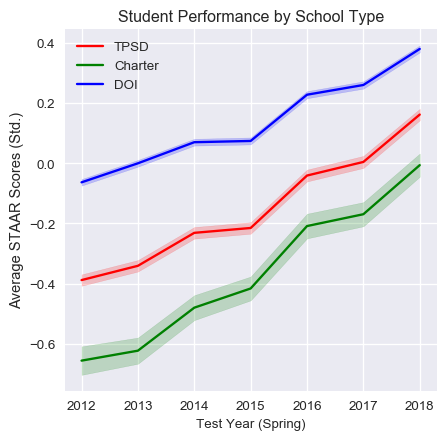

In [8]:
outcome = 'avescores'
def create_group_df(df, outcome):
    new_df = pd.DataFrame(df.groupby(['year']).agg({outcome: ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df[outcome]['score_mean'] + new_df[outcome]['score_se']
    new_df['lb'] = new_df[outcome]['score_mean'] - new_df[outcome]['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False], outcome)
df_charter = create_group_df(data[data.campischarter == 'Y'], outcome)
df_doi = create_group_df(data[data.doi == True], outcome)


plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(list(df_control.index), df_control[outcome]['score_mean'], color = 'red', label = 'TPSD')
plt.plot(list(df_charter.index), df_charter[outcome]['score_mean'], color = 'green', label = 'Charter')
plt.plot(list(df_doi.index), df_doi[outcome]['score_mean'], color = 'blue', label = 'DOI')

plt.legend()


plt.fill_between(list(df_control.index), df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(list(df_charter.index), df_charter.lb, df_charter.ub, color = 'green', alpha = .2)
plt.fill_between(list(df_doi.index), df_doi.lb, df_doi.ub, color = 'blue', alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by School Type')
plt.xlabel('Test Year (Spring)', size = 'medium')


#plt.savefig(table_path + 'all districts and dates.png', dpi = 600, bbox_inches="tight")
plt.show()